# trivar Gaussian

I think i'm going to random sample a trivariate gaussian for p values then plot the points in 3d were the colour is like the heat / probability

In [100]:
%%capture output
%pip install numpy
%pip install matplotlib
%pip install math
# apparently mpl_toolkits is good for 3d plotting stuff
%pip install mpl_toolkits

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D # used for the plotting

In [91]:
n = 3
covar = [[1, 0, 0],
         [0, 1, 0],
         [0, 0, 1]]
inverse_covar = np.linalg.inv(covar)
det_covar = np.linalg.det(covar)

M = [0,0,0]
pi, e = math.pi, math.e
k = (((2*pi)**(n/2))*((det_covar)**(1/2)))**-1
print(k)

def prob_calc(x):
    x_minus_M = np.subtract(x,M)
    # the left matrix multiplication in the exponenet
    temp1 = np.linalg.matmul(x_minus_M.transpose(),inverse_covar)
    # the right matrix multiplication in the exponent (temp2 is a scalar so i assume my vectors are the correct shape)
    temp2 = np.linalg.matmul(temp1,x_minus_M)
    p = (k*(e**(-0.5*temp2)))
    return p

0.06349363593424097


In [99]:
xyz_range = 1 # the range around the mean that i want
# think a cube of length 2*range with centre at the mean
rand_pos_floats = np.random.rand(1000,3)

res = []
for sample in rand_pos_floats:
    # changes the sample to the coords
    x = (sample[:3]-0.5)*xyz_range*2
    # remember the * operator unpacks the elements
    res.append([*x,prob_calc(x)])

res = np.array(res)

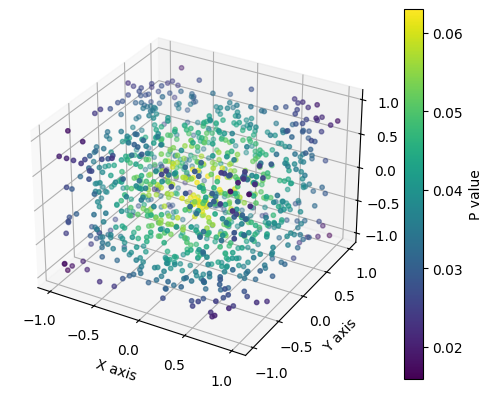

In [102]:

x = res[:, 0]
y = res[:, 1]
z = res[:, 2]
p = res[:, 3]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color based on p values
scatter = ax.scatter(x, y, z, c=p, cmap='viridis', s=10)

# Add a color bar
colorbar = plt.colorbar(scatter)
colorbar.set_label('P value')

# Set labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Show the plot
plt.show()

Choosing to sample from a uniform distribution was probabaly a mistake and makes the graph less visually appealing, maybe try to gibbs sample to find the centre and plot the proposals next